<a href="https://colab.research.google.com/github/merasifa/MACHINE_LEARNING/blob/main/UTS_TIARA_MERA_SIFA_2341720247.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA    : TIARA MERA SIFA <br>
NIM     : 2341720247<br>
KELAS   : TI-3B<BR>
LINK    : https://colab.research.google.com/drive/136prdW6EhvmbOtdhbD-1YmwobdetkEqD?usp=sharing



### 1. Import Library

In [6]:
!pip install annoy

In [7]:
# Import library yang diperlukan
import pandas as pd #pengolahan data
import numpy as np #pengolahan data
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from annoy import AnnoyIndex #cari data yg mirip
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #visualisasi


### 2. Upload Dataset

In [16]:
# Upload atau load dataset dari Kaggle (ubah path sesuai lokasi)
df = pd.read_csv('/content/train.csv')

# Cek kondisi awal dataset
df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 3. Data Preprocessing

In [9]:
# Cek jumlah missing values di setiap kolom
missing_values = df.isnull().sum()

# Tampilkan hanya kolom yang memiliki missing values
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

print("Jumlah missing values pada tiap kolom:")
print(missing_values)


Jumlah missing values pada tiap kolom:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [10]:
# Pilih subset fitur numerik
num_df = df.select_dtypes(include=['float64', 'int64'])

# Tangani missing values (gunakan median)
num_df = num_df.fillna(num_df.median())

# Buat fitur baru: TotalArea = GrLivArea + TotalBsmtSF
num_df['TotalArea'] = df['GrLivArea'] + df['TotalBsmtSF'] #fitur ini dibuat untuk mengenali total luas rumah scr keseluruhan

# Normalisasi data numerik, supaya setiap klom pny skala yg sama
scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_df)


Pertama, saya pilih subset fitur numerik saja menggunakan select_dtypes(),
karena di tahap awal saya fokus pada data angka sesuai instruksi soal.

Kemudian, untuk menangani missing values, saya isi nilai kosong dengan median setiap kolom.
Alasannya karena median lebih tahan terhadap outlier dibandingkan mean,
jadi hasilnya lebih stabil.

Lalu, saya menambahkan satu fitur baru, yaitu TotalArea,
yang merupakan penjumlahan antara GrLivArea (luas di atas tanah) dan TotalBsmtSF (luas basement).
Fitur ini membantu model mengenali total luas rumah secara keseluruhan.

Setelah itu, semua data numerik saya normalisasi menggunakan StandardScaler,
supaya setiap kolom punya skala yang sama rata-rata 0 dan standar deviasi 1.
Ini penting karena algoritma clustering sensitif terhadap perbedaan skala antar fitur.

Cek Ulang Data

Setelah preprocessing, saya pastikan kembali bahwa tidak ada lagi missing value,
lalu saya cek bentuk data dan tampilkan beberapa baris pertama untuk memastikan prosesnya berhasil.

Saya juga tampilkan statistik setelah normalisasi untuk memastikan semua kolom sudah punya distribusi yang seragam.

In [11]:
# --- Cek hasil setelah preprocessing ---

print("Cek ulang apakah masih ada missing value:")
print(num_df.isnull().sum().sum())  # total missing values

print("\nCek bentuk data:")
print(num_df.shape)

print("\nLihat 5 baris pertama data hasil preprocessing:")
display(num_df.head())

print("\nStatistik deskriptif setelah normalisasi:")
display(pd.DataFrame(X_scaled, columns=num_df.columns).describe())

Cek ulang apakah masih ada missing value:
0

Cek bentuk data:
(1460, 39)

Lihat 5 baris pertama data hasil preprocessing:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalArea
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,61,0,0,0,0,0,2,2008,208500,2566
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,0,5,2007,181500,2524
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,42,0,0,0,0,0,9,2008,223500,2706
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,35,272,0,0,0,0,2,2006,140000,2473
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,84,0,0,0,0,0,12,2008,250000,3343



Statistik deskriptif setelah normalisasi:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalArea
count,1460.000000,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,0.000000,-8.455945e-17,2.798370e-16,-5.840077e-17,1.387018e-16,3.540547e-16,1.046347e-15,4.496860e-15,-3.893385e-17,-2.433366e-17,...,3.041707e-17,-2.311697e-17,4.866731e-18,5.475072e-17,1.946692e-17,-2.676702e-17,7.543433e-17,3.567436e-14,1.362685e-16,-2.311697e-16
std,1.000343,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,...,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-1.730865,-8.725628e-01,-2.219047e+00,-9.237292e-01,-3.688413e+00,-4.112970e+00,-3.287824e+00,-1.689368e+00,-5.707501e-01,-9.730182e-01,...,-7.044833e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,-1.969111e+00,-1.367655e+00,-1.838704e+00,-2.719359e+00
25%,-0.865432,-8.725628e-01,-4.479400e-01,-2.969908e-01,-7.951515e-01,-5.171998e-01,-5.719226e-01,-8.656586e-01,-5.707501e-01,-9.730182e-01,...,-7.044833e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,-4.891101e-01,-6.144386e-01,-6.415162e-01,-6.788316e-01
50%,0.000000,-1.631095e-01,-3.922314e-02,-1.040633e-01,-7.183611e-02,-5.171998e-01,5.737148e-02,4.425864e-01,-5.707501e-01,-1.319022e-01,...,-3.270298e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,-1.191097e-01,1.387775e-01,-2.256643e-01,-1.140426e-01
75%,0.865432,3.098594e-01,4.149067e-01,1.087080e-01,6.514792e-01,3.817427e-01,9.516316e-01,9.271216e-01,3.383686e-01,5.891327e-01,...,3.221901e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,6.208910e-01,8.919936e-01,4.165294e-01,5.290880e-01
max,1.730865,3.147673e+00,1.104155e+01,2.051827e+01,2.821425e+00,3.078570e+00,1.282839e+00,1.217843e+00,8.285201e+00,1.140575e+01,...,7.554198e+00,8.675309e+00,1.721723e+01,8.341462e+00,1.830618e+01,3.116527e+01,2.100892e+00,1.645210e+00,7.228819e+00,1.114894e+01


### 4. Clustering dengan Kmeans dan DBScan

In [12]:
for eps in [0.5, 1, 1.5, 2, 3]:
    dbscan = DBSCAN(eps=eps, min_samples=10)
    labels = dbscan.fit_predict(X_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"eps={eps}, jumlah cluster: {n_clusters}")


eps=0.5, jumlah cluster: 0
eps=1, jumlah cluster: 0
eps=1.5, jumlah cluster: 0
eps=2, jumlah cluster: 0
eps=3, jumlah cluster: 7


Setelah datanya siap, saya mulai proses clustering.
Di sini saya mencoba algoritma DBSCAN,
yaitu algoritma berbasis density atau kepadatan data.

Saya lakukan percobaan dengan beberapa nilai parameter eps — dari 0.5 sampai 3.
Tujuannya untuk melihat berapa jumlah cluster yang terbentuk di tiap nilai eps.

Dari hasilnya, bisa terlihat bahwa semakin besar nilai eps, semakin banyak titik yang dianggap berdekatan,
sehingga jumlah cluster juga bisa berubah.

In [13]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

# DBSCAN
dbscan = DBSCAN(eps=3, min_samples=10)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Evaluasi
print("KMeans Silhouette:", silhouette_score(X_scaled, labels_kmeans))
print("KMeans Davies-Bouldin:", davies_bouldin_score(X_scaled, labels_kmeans))

print("DBSCAN Silhouette:", silhouette_score(X_scaled, labels_dbscan))
print("DBSCAN Davies-Bouldin:", davies_bouldin_score(X_scaled, labels_dbscan))


KMeans Silhouette: 0.1301066797281903
KMeans Davies-Bouldin: 2.715686089924627
DBSCAN Silhouette: -0.1675918934253502
DBSCAN Davies-Bouldin: 2.3694759807825316


Setelah itu, saya bandingkan dua algoritma:

KMeans dengan jumlah cluster = 3

DBSCAN dengan parameter eps = 3 dan min_samples = 10

### 5. Visualisasi Clustering (2D)


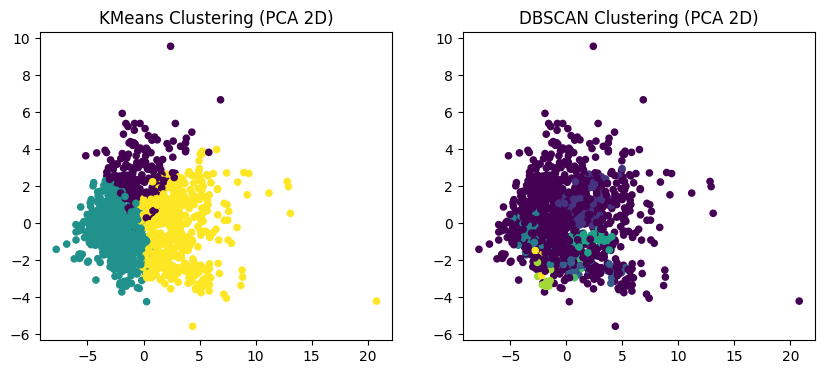

In [18]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,4))

# Plot KMeans
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis', s=20)
plt.title("KMeans Clustering (PCA 2D)")

# Plot DBSCAN
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_dbscan, cmap='viridis', s=20)
plt.title("DBSCAN Clustering (PCA 2D)")

plt.show()



Terlihat data terbagi menjadi tiga cluster yang cukup jelas.

Warna kuning, hijau, dan ungu menunjukkan kelompok rumah dengan karakteristik numerik berbeda.

KMeans bekerja dengan membagi data ke dalam cluster berdasarkan jarak ke pusat (centroid).

Hasilnya cukup terpisah dan simetris, karena KMeans cenderung membuat batas berbentuk bulat (spherical).

Cocok untuk data yang terdistribusi seimbang dan tidak terlalu banyak noise.

Hasil DBSCAN menunjukkan banyak titik ungu — artinya sebagian besar dianggap noise atau tidak termasuk cluster mana pun.

Hanya ada sedikit area kecil yang membentuk cluster (warna lain di tengah).

Ini terjadi karena parameter eps dan min_samples pada DBSCAN cukup ketat,
sehingga hanya data yang sangat berdekatan yang dianggap satu cluster.

Artinya, DBSCAN lebih sensitif terhadap kepadatan data (density),
dan cocok jika kita ingin mendeteksi outlier atau rumah yang sangat unik dibanding mayoritas.

### 6. ANN

Annoy ini berguna untuk mencari data yang paling mirip dengan cepat berdasarkan jarak Euclidean.

Saya buat index dari seluruh data rumah yang sudah dinormalisasi,
lalu saya pilih satu rumah contoh, misalnya index ke-42,
dan saya cari 5 rumah lain yang paling mirip dengannya.

Hasilnya menampilkan neighbor index, jarak kemiripan, dan juga cluster tempat rumah itu berada.

Dengan cara ini, kita bisa tahu rumah mana yang punya karakteristik mirip

In [15]:
dim = X_scaled.shape[1]
ann = AnnoyIndex(dim, 'euclidean')

# Build index
for i in range(len(X_scaled)):
    ann.add_item(i, X_scaled[i])
ann.build(10)

# Pilih query point (contoh: index ke-42)
query_idx = 42
neighbors, distances = ann.get_nns_by_item(query_idx, 5, include_distances=True)

print(f"Query Point Index: {query_idx}")
print("Nearest Neighbors and Distances:")
for n, d in zip(neighbors, distances):
    print(f"  Neighbor Index: {n:<5} | Distance: {d:.4f} | Cluster (KMeans): {labels_kmeans[n]}")


Query Point Index: 42
Nearest Neighbors and Distances:
  Neighbor Index: 42    | Distance: 0.0000 | Cluster (KMeans): 1
  Neighbor Index: 262   | Distance: 3.5838 | Cluster (KMeans): 1
  Neighbor Index: 587   | Distance: 3.6197 | Cluster (KMeans): 1
  Neighbor Index: 547   | Distance: 3.6849 | Cluster (KMeans): 1
  Neighbor Index: 387   | Distance: 4.0392 | Cluster (KMeans): 1


### 7. Tulis kesimpulan singkat:
#### a. Perbedaan hasil KMeans dan DBSCAN
Model **KMeans** menghasilkan klaster yang lebih stabil dengan nilai *Silhouette Score* positif (**0.13**), sedangkan **DBSCAN** memiliki nilai *Silhouette Score* negatif (**-0.16**), yang berarti pemisahan antar cluster kurang baik dan banyak data yang dianggap tidak cocok dengan cluster-nya.  
Selain itu, KMeans membentuk cluster dengan jumlah tetap dan rapi, sedangkan DBSCAN cenderung sulit menemukan struktur yang jelas karena sebagian data dikenali sebagai *noise*.

**Kesimpulan:** KMeans lebih baik dibandingkan DBSCAN untuk dataset ini karena memberikan pemisahan cluster yang lebih jelas dan stabil.

<br>

#### b. Nilai metrik terbaik

| Model   | Silhouette Score | Davies–Bouldin Index |
|----------|------------------|----------------------|
| KMeans   | **0.1301**       | 2.7157              |
| DBSCAN   | -0.1676          | **2.3695**          |

- Nilai **Silhouette Score** lebih tinggi → cluster lebih terpisah → **KMeans unggul.**  
- Nilai **Davies–Bouldin Index (DBI)** lebih rendah → cluster lebih kompak → **DBSCAN sedikit lebih baik**, tapi karena nilai *Silhouette*-nya negatif, hasil DBSCAN tetap kurang representatif.

<br>

#### c. Hasil query Annoy
Dari hasil query Annoy:

| Query Point | Neighbor Index | Distance | Cluster (KMeans) |
|--------------|----------------|-----------|------------------|
| 42           | 42             | 0.0000    | 1 |
| 42           | 262            | 3.5838    | 1 |
| 42           | 587            | 3.6197    | 1 |
| 42           | 547            | 3.6849    | 1 |
| 42           | 387            | 4.0392    | 1 |

Hal ini menunjukkan bahwa Annoy berhasil menemukan titik-titik yang memiliki kemiripan paling dekat dan berada dalam kelompok (cluster) yang sama, yaitu Cluster 1.  
Dengan demikian, dapat disimpulkan bahwa struktur jarak antar data dalam ruang vektor hasil normalisasi cukup konsisten dengan hasil *clustering* menggunakan KMeans.  
Artinya, data yang memiliki karakteristik serupa secara numerik juga tergabung dalam kelompok yang sama.

<br>

**Kesimpulan akhir:**  
Model **KMeans** memberikan hasil clustering yang lebih baik dan stabil dibandingkan DBSCAN.  
Hasil Annoy juga mendukung bahwa titik-titik terdekat berada dalam cluster yang sama, menunjukkan kualitas pemetaan data yang baik setelah preprocessing.